 __DATA MANIPULATION__

In [1]:
# Data source https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

# Using only a subset of the data with labels: angry, happy, sad, fearful



In [2]:
#list the files in the dataset directory
import numpy as np
np.random.seed(1)

In [3]:
import glob
#(glob.glob("Dataset/Training set/angry/*.jpg"))

In [4]:
import glob
angry_files=glob.glob("Datasets/Training set/angry/*.jpg")
happy_files=glob.glob("Datasets/Training set/happy/*.jpg")
fear_files=glob.glob("Datasets/Training set/fear/*.jpg")
sad_files=glob.glob("Datasets/Training set/sad/*.jpg")

In [5]:
angry_files[:10]

['Datasets/Training set/angry\\0.jpg',
 'Datasets/Training set/angry\\1.jpg',
 'Datasets/Training set/angry\\10.jpg',
 'Datasets/Training set/angry\\10002.jpg',
 'Datasets/Training set/angry\\10016.jpg',
 'Datasets/Training set/angry\\10037.jpg',
 'Datasets/Training set/angry\\10038.jpg',
 'Datasets/Training set/angry\\10057.jpg',
 'Datasets/Training set/angry\\10063.jpg',
 'Datasets/Training set/angry\\10069.jpg']

In [6]:
happy_files[:10]

['Datasets/Training set/happy\\100.jpg',
 'Datasets/Training set/happy\\10000.jpg',
 'Datasets/Training set/happy\\10001.jpg',
 'Datasets/Training set/happy\\10005.jpg',
 'Datasets/Training set/happy\\10035.jpg',
 'Datasets/Training set/happy\\10039.jpg',
 'Datasets/Training set/happy\\1004.jpg',
 'Datasets/Training set/happy\\10042.jpg',
 'Datasets/Training set/happy\\10046.jpg',
 'Datasets/Training set/happy\\10050.jpg']

In [7]:
fear_files[:5]

['Datasets/Training set/fear\\10010.jpg',
 'Datasets/Training set/fear\\10012.jpg',
 'Datasets/Training set/fear\\10015.jpg',
 'Datasets/Training set/fear\\10025.jpg',
 'Datasets/Training set/fear\\10032.jpg']

In [8]:
sad_files[:5]

['Datasets/Training set/sad\\10006.jpg',
 'Datasets/Training set/sad\\10008.jpg',
 'Datasets/Training set/sad\\1001.jpg',
 'Datasets/Training set/sad\\10020.jpg',
 'Datasets/Training set/sad\\10028.jpg']

In [9]:
# import images as numpy arrays.
# The numpy arrays representation will be used for the NN with Momentum 

# Loading images subset 

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [11]:
angry_files[0]

'Datasets/Training set/angry\\0.jpg'

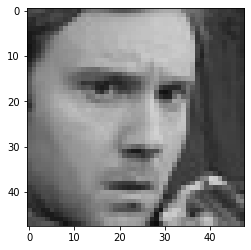

In [12]:
# Display image as greyscale original
img=mpimg.imread(angry_files[0])
imgplot = plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()

In [13]:
#read in image as an array of grey-scale pixels 
# need to be normalized in order to be used as input

In [14]:
from PIL import Image
im = Image.open(angry_files[0])
im.show()

#print(list(np.asarray(im)))

In [15]:
image_pixels=np.asarray(im,dtype=np.int16)
image_pixels

array([[ 72,  78,  81, ...,  52,  43,  40],
       [ 65,  62,  59, ...,  55,  52,  45],
       [ 47,  42,  60, ...,  47,  54,  49],
       ...,
       [ 91,  65,  46, ...,  74,  54,  43],
       [ 76,  80,  76, ..., 108,  69,  46],
       [ 77,  74,  81, ..., 105, 108,  82]], dtype=int16)

In [16]:
image_pixels.dtype #

dtype('int16')

In [17]:
image_pixels.shape

(48, 48)

In [18]:
image_pixels[0:1,0:] # first row of the matrix above

array([[ 72,  78,  81,  75,  59,  54,  63,  61,  55,  55,  62,  46,  93,
        114, 121, 119, 115, 109,  98,  90,  85,  84,  90,  99, 109, 127,
        143, 153, 161, 168, 171, 171, 170, 166, 127, 112, 112, 107,  96,
         78,  64,  64,  56,  57,  61,  52,  43,  40]], dtype=int16)

In [19]:
image_pixels_flatten=image_pixels.flatten() # flatten 48*48 matrix

In [20]:
len(image_pixels_flatten) # 48*48=2304

2304

In [21]:
print(image_pixels_flatten.max()) # values between 0 and 255 for grey-scale image pixels. 
print(image_pixels_flatten.min())

209
11


In [22]:
#load all images as numpy arrays   "Angry faces"

#plain list

images_arrays= [] # list holding flattened pixel arrays 
counter=0
for file in angry_files:
    #print(file)
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    #print(image_pixels.max())
    #print(image_pixels.min())
    
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    images_arrays.append(image_pixels_flat)
    #print(images_arrays[-10:])
    

    


In [23]:
image_arrays_angry_np=np.array(images_arrays) 

In [24]:
image_arrays_angry_np.shape  # (number_of_samples,number_of_features/pixels (48*48=2304))

(3993, 2304)

In [25]:
image_arrays_angry_np[:10,:10] # some samples from all the data, use this to create TF.DATASET

array([[ 72,  78,  81,  75,  59,  54,  63,  61,  55,  55],
       [152, 149, 147, 157, 146, 133, 114, 138, 170, 175],
       [ 29,  25,  21,  23,  26,  24,  49,  67,  85, 101],
       [ 32,  23,  20,  56,  43,  34,  38,  46,  92,  99],
       [222, 218, 202, 189, 199, 208, 193, 134, 103,  89],
       [238, 239, 237, 234, 232, 228, 231, 203, 170, 152],
       [ 35,  26,  25,  14,  12,  14,  17,  20,  22,  22],
       [120, 119, 120, 121, 121, 122, 122, 123, 122, 120],
       [255, 255, 254, 255, 250, 223, 179, 125, 119, 106],
       [ 73,  77,  79, 105, 130, 128,  92,  81,  76,  55]], dtype=int16)

In [26]:
images_arrays_happy= [] 

for file in happy_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_happy.append(image_pixels_flat)
    


In [27]:
image_arrays_happy_np=np.array(images_arrays_happy) #

In [28]:
image_arrays_happy_np

array([[162, 163, 158, ..., 194, 192, 197],
       [134, 127, 134, ...,  34,  36,  32],
       [253, 253, 247, ..., 124, 120, 114],
       ...,
       [138, 144, 139, ..., 165, 199, 220],
       [153, 105, 101, ...,  41,  51,  57],
       [ 74,  73,  50, ..., 141, 137, 143]], dtype=int16)

In [29]:
image_arrays_happy_np.shape  # 7k samples

(7164, 2304)

In [30]:
image_arrays_angry_np.shape

(3993, 2304)

In [31]:
image_arrays_happy_np.shape

(7164, 2304)

In [32]:
image_arrays_angry_np

array([[ 72,  78,  81, ..., 105, 108,  82],
       [152, 149, 147, ..., 193, 181, 183],
       [ 29,  25,  21, ..., 174, 173, 174],
       ...,
       [ 67,  49,  46, ...,  47,  55,  40],
       [ 14,  14,  17, ...,  33,  36,  37],
       [162, 148, 141, ...,  67,  76,  82]], dtype=int16)

In [33]:
image_arrays_happy_np

array([[162, 163, 158, ..., 194, 192, 197],
       [134, 127, 134, ...,  34,  36,  32],
       [253, 253, 247, ..., 124, 120, 114],
       ...,
       [138, 144, 139, ..., 165, 199, 220],
       [153, 105, 101, ...,  41,  51,  57],
       [ 74,  73,  50, ..., 141, 137, 143]], dtype=int16)

In [34]:
images_arrays_sad= [] 

for file in sad_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_sad.append(image_pixels_flat)
    


In [35]:
image_arrays_sad_np=np.array(images_arrays_sad) #

In [36]:
image_arrays_sad_np

array([[137, 137, 142, ...,  17,  16,  15],
       [ 31,  33,  32, ...,  96,  96,  95],
       [ 54,  34,  44, ...,  41,  64,  52],
       ...,
       [ 44,  44,  45, ..., 171, 193, 199],
       [109,  23,  21, ...,  21,  24,  53],
       [ 92,  86,  87, ..., 102, 107,  97]], dtype=int16)

In [37]:
images_arrays_fear= [] 

for file in fear_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_fear.append(image_pixels_flat)
    

In [38]:
images_arrays_fear[0]

array([116,  98,  85, ..., 199, 162, 122], dtype=int16)

In [39]:
image_arrays_fear_np=np.array(images_arrays_fear) #

In [40]:
image_arrays_fear_np

array([[116,  98,  85, ..., 199, 162, 122],
       [254, 250, 163, ..., 254, 253, 252],
       [230, 230, 229, ..., 164, 154, 129],
       ...,
       [131, 145, 155, ...,  25,  27,  21],
       [198, 176, 176, ...,  30,  47,  71],
       [ 84,  68,  62, ..., 194, 113, 122]], dtype=int16)

# Normalize pixel values 


In [41]:
normalized_happy = image_arrays_happy_np/255
normalized_angry= image_arrays_angry_np/255

In [42]:
normalized_sad=image_arrays_sad_np/255

In [43]:
normalized_fear = image_arrays_fear_np / 255

In [44]:
normalized_happy

array([[0.63529412, 0.63921569, 0.61960784, ..., 0.76078431, 0.75294118,
        0.77254902],
       [0.5254902 , 0.49803922, 0.5254902 , ..., 0.13333333, 0.14117647,
        0.1254902 ],
       [0.99215686, 0.99215686, 0.96862745, ..., 0.48627451, 0.47058824,
        0.44705882],
       ...,
       [0.54117647, 0.56470588, 0.54509804, ..., 0.64705882, 0.78039216,
        0.8627451 ],
       [0.6       , 0.41176471, 0.39607843, ..., 0.16078431, 0.2       ,
        0.22352941],
       [0.29019608, 0.28627451, 0.19607843, ..., 0.55294118, 0.5372549 ,
        0.56078431]])

In [45]:
normalized_angry

array([[0.28235294, 0.30588235, 0.31764706, ..., 0.41176471, 0.42352941,
        0.32156863],
       [0.59607843, 0.58431373, 0.57647059, ..., 0.75686275, 0.70980392,
        0.71764706],
       [0.11372549, 0.09803922, 0.08235294, ..., 0.68235294, 0.67843137,
        0.68235294],
       ...,
       [0.2627451 , 0.19215686, 0.18039216, ..., 0.18431373, 0.21568627,
        0.15686275],
       [0.05490196, 0.05490196, 0.06666667, ..., 0.12941176, 0.14117647,
        0.14509804],
       [0.63529412, 0.58039216, 0.55294118, ..., 0.2627451 , 0.29803922,
        0.32156863]])

In [46]:
normalized_fear

array([[0.45490196, 0.38431373, 0.33333333, ..., 0.78039216, 0.63529412,
        0.47843137],
       [0.99607843, 0.98039216, 0.63921569, ..., 0.99607843, 0.99215686,
        0.98823529],
       [0.90196078, 0.90196078, 0.89803922, ..., 0.64313725, 0.60392157,
        0.50588235],
       ...,
       [0.51372549, 0.56862745, 0.60784314, ..., 0.09803922, 0.10588235,
        0.08235294],
       [0.77647059, 0.69019608, 0.69019608, ..., 0.11764706, 0.18431373,
        0.27843137],
       [0.32941176, 0.26666667, 0.24313725, ..., 0.76078431, 0.44313725,
        0.47843137]])

In [47]:
normalized_sad

array([[0.5372549 , 0.5372549 , 0.55686275, ..., 0.06666667, 0.0627451 ,
        0.05882353],
       [0.12156863, 0.12941176, 0.1254902 , ..., 0.37647059, 0.37647059,
        0.37254902],
       [0.21176471, 0.13333333, 0.17254902, ..., 0.16078431, 0.25098039,
        0.20392157],
       ...,
       [0.17254902, 0.17254902, 0.17647059, ..., 0.67058824, 0.75686275,
        0.78039216],
       [0.42745098, 0.09019608, 0.08235294, ..., 0.08235294, 0.09411765,
        0.20784314],
       [0.36078431, 0.3372549 , 0.34117647, ..., 0.4       , 0.41960784,
        0.38039216]])

# Adding labels at the end of each sample array 

 __Angry : 0__
 
 __Happy : 1__
 
 __Sad : 2__
 
 __Fear : 3__

In [48]:
# add the label 'angry'
new_angry_list=[]
for sample in normalized_angry:
    sample = np.append(sample, 0)
    new_angry_list.append(sample)

In [49]:
for sample in new_angry_list:
    print(sample[0])

0.2823529411764706
0.596078431372549
0.11372549019607843
0.12549019607843137
0.8705882352941177
0.9333333333333333
0.13725490196078433
0.47058823529411764
1.0
0.28627450980392155
0.11764705882352941
0.27450980392156865
0.9058823529411765
0.36470588235294116
0.25098039215686274
0.9921568627450981
0.984313725490196
0.06274509803921569
0.8549019607843137
0.0
0.5607843137254902
0.35294117647058826
0.1607843137254902
0.33725490196078434
0.3176470588235294
0.2901960784313726
0.00784313725490196
0.4235294117647059
1.0
0.6901960784313725
1.0
0.611764705882353
0.5058823529411764
0.21568627450980393
0.13333333333333333
0.34509803921568627
0.41568627450980394
0.996078431372549
0.16470588235294117
0.0
0.0
0.4666666666666667
0.7725490196078432
0.48627450980392156
0.16862745098039217
1.0
0.10980392156862745
0.7294117647058823
0.38823529411764707
0.2901960784313726
0.611764705882353
0.07058823529411765
0.4666666666666667
0.5450980392156862
1.0
1.0
0.9176470588235294
0.792156862745098
0.00784313725490

0.592156862745098
0.5843137254901961
1.0
0.7764705882352941
0.0784313725490196
0.47058823529411764
0.00392156862745098
0.9882352941176471
0.9882352941176471
0.6352941176470588
0.615686274509804
0.058823529411764705
0.22745098039215686
0.5137254901960784
0.4823529411764706
0.4
0.3411764705882353
0.5882352941176471
0.23137254901960785
0.0196078431372549
0.33725490196078434
0.06666666666666667
0.8313725490196079
0.7843137254901961
0.3215686274509804
0.788235294117647
0.11372549019607843
0.06274509803921569
0.3686274509803922
0.06274509803921569
0.12941176470588237
0.4196078431372549
0.5294117647058824
0.011764705882352941
0.9764705882352941
0.6901960784313725
0.15294117647058825
0.8980392156862745
0.12941176470588237
0.9215686274509803
0.03137254901960784
0.4
0.2196078431372549
0.6666666666666666
0.047058823529411764
0.35294117647058826
0.14901960784313725
0.00392156862745098
0.011764705882352941
0.4196078431372549
0.8
0.6509803921568628
0.9921568627450981
0.7098039215686275
0.47058823529

0.26666666666666666
0.8941176470588236
0.14901960784313725
0.36470588235294116
0.00392156862745098
0.043137254901960784
0.9490196078431372
0.4627450980392157
0.7333333333333333
1.0
0.34509803921568627
0.4196078431372549
0.24705882352941178
0.16470588235294117
0.5607843137254902
0.00784313725490196
0.19215686274509805
0.3764705882352941
0.7764705882352941
0.3764705882352941
0.5294117647058824
0.20784313725490197
1.0
0.03137254901960784
0.5686274509803921
0.7686274509803922
0.09019607843137255
0.03137254901960784
0.7058823529411765
0.054901960784313725
0.5490196078431373
0.18823529411764706
0.2980392156862745
0.7098039215686275
0.9333333333333333
0.9568627450980393
0.7098039215686275
0.7803921568627451
1.0
0.9058823529411765
1.0
0.06274509803921569
0.9294117647058824
0.5764705882352941
0.7098039215686275
0.21568627450980393
0.5568627450980392
0.24705882352941178
0.47058823529411764
0.7019607843137254
0.9725490196078431
0.0
0.4666666666666667
0.2901960784313726
0.996078431372549
0.4235294

In [50]:
# add the label
new_happy_list=[]
for sample in normalized_happy:
    sample = np.append(sample, 1)
    new_happy_list.append(sample)

In [51]:
for sample in new_happy_list:
    print(sample[0])

0.6352941176470588
0.5254901960784314
0.9921568627450981
0.7176470588235294
0.9764705882352941
0.9372549019607843
0.03137254901960784
0.27058823529411763
0.796078431372549
0.058823529411764705
0.8117647058823529
0.8117647058823529
0.3254901960784314
0.7568627450980392
0.4392156862745098
1.0
0.6235294117647059
0.24705882352941178
0.6509803921568628
0.7607843137254902
0.4196078431372549
0.43137254901960786
0.12549019607843137
0.611764705882353
0.396078431372549
0.2
0.49019607843137253
0.9411764705882353
0.4980392156862745
0.3843137254901961
0.9450980392156862
0.011764705882352941
0.7725490196078432
0.27058823529411763
0.01568627450980392
0.35294117647058826
0.28627450980392155
0.2235294117647059
0.6509803921568628
0.27058823529411763
0.058823529411764705
0.5215686274509804
0.4980392156862745
0.27450980392156865
0.3176470588235294
0.10980392156862745
0.6196078431372549
0.29411764705882354
0.21176470588235294
0.6901960784313725
0.8901960784313725
0.06274509803921569
0.2
0.6470588235294118


0.28627450980392155
0.6862745098039216
1.0
0.023529411764705882
0.9803921568627451
0.3058823529411765
0.9058823529411765
0.054901960784313725
0.00784313725490196
0.6078431372549019
0.7411764705882353
0.03137254901960784
0.35294117647058826
0.1803921568627451
0.9529411764705882
0.403921568627451
0.1450980392156863
0.2196078431372549
0.03529411764705882
0.2901960784313726
0.10196078431372549
0.3764705882352941
1.0
0.06666666666666667
0.6313725490196078
0.12549019607843137
0.8470588235294118
0.6745098039215687
0.16470588235294117
0.8313725490196079
0.8666666666666667
0.00784313725490196
0.6039215686274509
0.1411764705882353
0.17254901960784313
0.8705882352941177
0.29411764705882354
0.4823529411764706
0.22745098039215686
0.27058823529411763
0.6666666666666666
0.43529411764705883
0.6352941176470588
0.5647058823529412
0.6862745098039216
0.06274509803921569
0.12941176470588237
0.48627450980392156
0.3607843137254902
0.24313725490196078
1.0
0.49411764705882355
0.28627450980392155
0.286274509803

0.7803921568627451
0.14901960784313725
0.17647058823529413
0.8823529411764706
0.6823529411764706
0.0784313725490196
0.3686274509803922
0.7058823529411765
0.4745098039215686
0.9882352941176471
0.3137254901960784
0.17647058823529413
0.39215686274509803
0.043137254901960784
0.37254901960784315
0.09803921568627451
0.14901960784313725
0.3411764705882353
0.4549019607843137
0.24705882352941178
0.6078431372549019
0.3686274509803922
0.4235294117647059
0.5568627450980392
0.16862745098039217
0.43137254901960786
0.20392156862745098
0.3803921568627451
0.12156862745098039
0.17254901960784313
0.984313725490196
0.9098039215686274
0.5058823529411764
0.09803921568627451
0.8980392156862745
0.2
0.8784313725490196
0.9019607843137255
0.4666666666666667
0.7215686274509804
0.5215686274509804
0.6039215686274509
0.050980392156862744
0.9372549019607843
0.9529411764705882
0.23921568627450981
0.996078431372549
0.8117647058823529
0.8705882352941177
0.3137254901960784
0.8823529411764706
0.5607843137254902
1.0
0.1294

0.6705882352941176
0.23137254901960785
0.9411764705882353
0.9882352941176471
0.40784313725490196
0.9333333333333333
0.047058823529411764
0.9921568627450981
0.3607843137254902
0.047058823529411764
0.10196078431372549
0.6588235294117647
0.023529411764705882
0.44313725490196076
0.8431372549019608
0.3764705882352941
0.7568627450980392
0.396078431372549
0.37254901960784315
0.6823529411764706
0.3568627450980392
1.0
0.3058823529411765
0.8823529411764706
0.16470588235294117
0.1803921568627451
0.5725490196078431
0.40784313725490196
0.9921568627450981
0.596078431372549
0.9411764705882353
0.15294117647058825
0.34901960784313724
0.3568627450980392
0.32941176470588235
0.7686274509803922
0.13725490196078433
0.06274509803921569
0.44313725490196076
0.8941176470588236
0.4745098039215686
0.047058823529411764
0.047058823529411764
0.9019607843137255
0.7098039215686275
0.24313725490196078
0.4666666666666667
1.0
0.4117647058823529
0.7843137254901961
0.0
0.7098039215686275
0.6313725490196078
0.79607843137254

0.8235294117647058
0.6431372549019608
0.796078431372549
0.8705882352941177
0.21568627450980393
0.9137254901960784
0.5215686274509804
0.1607843137254902
0.9176470588235294
0.8196078431372549
0.7254901960784313
1.0
0.03529411764705882
0.32941176470588235
0.26666666666666666
0.28627450980392155
0.9529411764705882
0.4470588235294118
0.9294117647058824
0.5450980392156862
0.9882352941176471
0.01568627450980392
0.996078431372549
0.9921568627450981
0.13333333333333333
0.7529411764705882
0.403921568627451
0.9411764705882353
0.7294117647058823
0.37254901960784315
0.24313725490196078
0.5372549019607843
0.06666666666666667
0.27058823529411763
0.9294117647058824
0.8
0.5372549019607843
0.25882352941176473
0.5098039215686274
0.29411764705882354
0.28627450980392155
0.9333333333333333
0.17647058823529413
0.2
0.6862745098039216
0.3176470588235294
0.6431372549019608
0.996078431372549
0.6745098039215687
0.13725490196078433
1.0
0.4588235294117647
0.2235294117647059
0.6823529411764706
0.8470588235294118
0.0

In [52]:
# add the label
new_sad_list=[]
for sample in normalized_sad:
    sample = np.append(sample, 2)
    new_sad_list.append(sample)

In [53]:
for sample in new_sad_list:
    print(sample[0])

0.5372549019607843
0.12156862745098039
0.21176470588235294
0.7607843137254902
0.6392156862745098
0.5294117647058824
0.058823529411764705
0.47058823529411764
0.6078431372549019
0.9215686274509803
0.8313725490196079
0.17254901960784313
0.12156862745098039
0.5411764705882353
0.16862745098039217
0.2
0.4470588235294118
0.4627450980392157
0.15294117647058825
0.06274509803921569
0.24705882352941178
0.7686274509803922
0.00784313725490196
0.5294117647058824
0.7725490196078432
0.32941176470588235
0.18823529411764706
0.25882352941176473
0.7058823529411765
0.38823529411764707
0.6705882352941176
0.03529411764705882
0.5803921568627451
0.5490196078431373
0.3607843137254902
0.6470588235294118
0.23137254901960785
0.36470588235294116
0.12156862745098039
0.5372549019607843
0.35294117647058826
0.0
0.6980392156862745
0.8705882352941177
0.6509803921568628
0.00392156862745098
0.7019607843137254
0.2784313725490196
0.8901960784313725
0.984313725490196
0.9921568627450981
0.5764705882352941
0.3215686274509804
0.

0.9450980392156862
0.34901960784313724
0.9568627450980393
0.5294117647058824
0.27450980392156865
0.3568627450980392
0.11764705882352941
0.6196078431372549
0.43529411764705883
0.8627450980392157
0.4666666666666667
0.5803921568627451
0.8117647058823529
0.48627450980392156
0.4196078431372549
0.8980392156862745
0.16470588235294117
0.6078431372549019
0.4
0.11372549019607843
0.2235294117647059
0.4666666666666667
0.08627450980392157
0.0
0.4
0.4745098039215686
0.7176470588235294
0.6666666666666666
0.23921568627450981
0.11372549019607843
0.0392156862745098
0.6392156862745098
0.09411764705882353
0.17647058823529413
0.06274509803921569
0.6431372549019608
0.4117647058823529
0.11372549019607843
0.8235294117647058
0.9294117647058824
0.08627450980392157
0.2784313725490196
0.047058823529411764
0.0
0.596078431372549
0.21568627450980393
0.023529411764705882
0.3686274509803922
0.054901960784313725
0.19215686274509805
0.10980392156862745
0.6901960784313725
0.7372549019607844
0.01568627450980392
0.52156862

0.30980392156862746
0.8745098039215686
0.23137254901960785
0.27450980392156865
0.9921568627450981
0.5411764705882353
0.7450980392156863
0.396078431372549
0.4627450980392157
0.01568627450980392
0.9058823529411765
0.03137254901960784
0.09411764705882353
0.00392156862745098
0.0
0.2549019607843137
0.3843137254901961
0.4392156862745098
0.7254901960784313
0.6627450980392157
0.011764705882352941
0.9294117647058824
0.2901960784313726
0.6
0.5411764705882353
0.0
0.7568627450980392
0.4549019607843137
0.6274509803921569
0.7411764705882353
0.5882352941176471
0.043137254901960784
0.7176470588235294
0.054901960784313725
0.7568627450980392
0.6745098039215687
0.7529411764705882
0.011764705882352941
0.5019607843137255
0.8392156862745098
0.6666666666666666
0.2
0.4470588235294118
0.1803921568627451
0.6705882352941176
0.2980392156862745
0.7176470588235294
1.0
0.011764705882352941
0.6862745098039216
0.41568627450980394
0.4235294117647059
0.8313725490196079
0.792156862745098
0.33725490196078434
0.23529411764

0.9803921568627451
0.996078431372549
0.9803921568627451
0.0196078431372549
0.2901960784313726
0.3843137254901961
0.43529411764705883
0.5686274509803921
0.6588235294117647
0.34901960784313724
0.38823529411764707
0.6274509803921569
0.20784313725490197
0.4627450980392157
0.984313725490196
0.07058823529411765
0.2235294117647059
0.16470588235294117
0.6470588235294118
0.5176470588235295
0.050980392156862744
0.027450980392156862
0.14901960784313725
0.5294117647058824
0.9294117647058824
0.9882352941176471
0.21176470588235294
0.058823529411764705
0.5137254901960784
0.7254901960784313
0.5647058823529412
0.5450980392156862
0.06274509803921569
0.12941176470588237
0.9882352941176471
0.2627450980392157
0.0196078431372549
0.7058823529411765
0.4196078431372549
0.07058823529411765
0.9607843137254902
0.1411764705882353
0.2627450980392157
0.41568627450980394
0.42745098039215684
0.16862745098039217
0.3058823529411765
0.043137254901960784
0.9411764705882353
0.5764705882352941
0.796078431372549
0.1254901960

0.12941176470588237
0.3254901960784314
0.5450980392156862
0.00392156862745098
0.6313725490196078
0.27450980392156865
0.09019607843137255
0.6392156862745098
0.5647058823529412
0.0
0.5176470588235295
0.5882352941176471
0.20784313725490197
0.5764705882352941
0.18823529411764706
0.5176470588235295
0.17647058823529413
0.5333333333333333
0.40784313725490196
0.7294117647058823
0.2784313725490196
0.43137254901960786
0.5098039215686274
0.9882352941176471
0.054901960784313725
0.21568627450980393
0.9490196078431372
0.09411764705882353
0.0
0.9254901960784314
0.8666666666666667
0.2196078431372549
0.5176470588235295
0.45098039215686275
0.5686274509803921
0.3333333333333333
0.3058823529411765
0.8941176470588236
0.06274509803921569
0.2980392156862745
0.8431372549019608
0.43529411764705883
0.5215686274509804
1.0
0.09803921568627451
0.2980392156862745
0.23529411764705882
0.4
0.41568627450980394
0.35294117647058826
0.0784313725490196
0.13333333333333333
0.3137254901960784
0.4627450980392157
0.84313725490

In [54]:
# add the label
new_fear_list=[]
for sample in normalized_fear:
    sample = np.append(sample, 3)
    new_fear_list.append(sample)

In [55]:
for sample in new_fear_list:
    print(sample[0])

0.4549019607843137
0.996078431372549
0.9019607843137255
0.7058823529411765
0.14901960784313725
0.24705882352941178
0.5372549019607843
0.11764705882352941
0.24313725490196078
0.996078431372549
0.5215686274509804
0.9764705882352941
0.09019607843137255
1.0
0.7019607843137254
0.49019607843137253
0.9058823529411765
0.0
0.6941176470588235
0.15294117647058825
0.2
0.5882352941176471
0.30196078431372547
0.1803921568627451
0.9529411764705882
0.996078431372549
0.8431372549019608
0.9568627450980393
1.0
0.6431372549019608
0.6235294117647059
1.0
0.3215686274509804
1.0
0.6509803921568628
0.8313725490196079
0.6862745098039216
0.050980392156862744
0.8470588235294118
0.3137254901960784
0.6823529411764706
0.6588235294117647
0.8431372549019608
0.12941176470588237
1.0
0.6078431372549019
0.3254901960784314
0.19215686274509805
0.0392156862745098
0.13725490196078433
0.2
0.34901960784313724
0.996078431372549
0.5254901960784314
0.13333333333333333
1.0
0.09411764705882353
0.14901960784313725
1.0
0.56862745098039

0.5882352941176471
0.615686274509804
0.03137254901960784
0.13725490196078433
0.7411764705882353
0.7568627450980392
0.3803921568627451
0.5294117647058824
0.25882352941176473
0.09411764705882353
1.0
0.4980392156862745
0.23529411764705882
0.6901960784313725
0.9803921568627451
0.7647058823529411
0.6745098039215687
1.0
0.0392156862745098
0.788235294117647
0.3568627450980392
0.7098039215686275
0.3607843137254902
0.4392156862745098
0.8666666666666667
0.403921568627451
0.22745098039215686
0.9294117647058824
0.6901960784313725
1.0
0.7803921568627451
0.7176470588235294
1.0
0.38823529411764707
1.0
0.8705882352941177
0.984313725490196
0.8549019607843137
0.6
0.023529411764705882
0.996078431372549
0.7490196078431373
0.6078431372549019
0.12156862745098039
0.8588235294117647
0.25882352941176473
0.5098039215686274
0.807843137254902
0.14901960784313725
0.9529411764705882
0.8470588235294118
0.27450980392156865
0.3607843137254902
0.30980392156862746
0.9921568627450981
0.5215686274509804
0.6313725490196078

0.5843137254901961
0.2196078431372549
0.9921568627450981
0.10980392156862745
0.5215686274509804
0.611764705882353
0.9921568627450981
0.4117647058823529
0.6823529411764706
0.6274509803921569
0.996078431372549
0.3843137254901961
0.40784313725490196
0.9764705882352941
0.6588235294117647
0.6196078431372549
0.7529411764705882
0.24705882352941178
0.8
0.4823529411764706
0.615686274509804
1.0
0.00392156862745098
1.0
0.11372549019607843
0.8313725490196079
0.08627450980392157
0.39215686274509803
0.9058823529411765
0.10196078431372549
0.9137254901960784
0.1607843137254902
1.0
0.7411764705882353
1.0
0.47058823529411764
0.3333333333333333
1.0
0.7529411764705882
0.7529411764705882
0.027450980392156862
0.9568627450980393
0.8274509803921568
0.7607843137254902
0.6666666666666666
0.00784313725490196
0.1803921568627451
0.996078431372549
0.6
0.9803921568627451
0.20392156862745098
0.7647058823529411
0.403921568627451
0.3843137254901961
0.20392156862745098
0.25882352941176473
1.0
0.0
0.13333333333333333
0.2

0.09411764705882353
0.4980392156862745
0.5686274509803921
0.996078431372549
0.30196078431372547
0.8
0.5647058823529412
0.4392156862745098
0.00392156862745098
0.8352941176470589
0.9803921568627451
0.49019607843137253
0.21176470588235294
0.6392156862745098
0.40784313725490196
0.33725490196078434
0.14901960784313725
0.023529411764705882
0.4392156862745098
1.0
0.8274509803921568
0.8745098039215686
0.1568627450980392
0.1607843137254902
0.5215686274509804
0.15294117647058825
0.1843137254901961
0.09019607843137255
0.0
0.17254901960784313
0.8156862745098039
0.9450980392156862
0.8352941176470589
0.1450980392156863
0.0
0.01568627450980392
0.396078431372549
0.7215686274509804
0.12549019607843137
0.7254901960784313
0.07450980392156863
0.3607843137254902
0.8941176470588236
0.25098039215686274
0.3411764705882353
0.6078431372549019
0.7098039215686275
0.9215686274509803
0.984313725490196
0.7215686274509804
0.6901960784313725
0.1843137254901961
0.807843137254902
0.4235294117647059
0.7176470588235294
0.

0.6823529411764706
1.0
0.5607843137254902
1.0
0.27450980392156865
0.803921568627451
0.24705882352941178
0.24705882352941178
0.43529411764705883
0.38823529411764707
1.0
0.996078431372549
0.9137254901960784
0.3803921568627451
0.0392156862745098
0.28627450980392155
0.21176470588235294
0.44313725490196076
0.3137254901960784
0.8470588235294118
0.9215686274509803
0.07058823529411765
0.47058823529411764
0.34509803921568627
0.23529411764705882
0.615686274509804
0.023529411764705882
0.26666666666666666
0.45098039215686275
1.0
0.054901960784313725
0.5568627450980392
0.0392156862745098
0.9725490196078431
0.7215686274509804
0.19215686274509805
1.0
0.2549019607843137
0.14901960784313725
0.09803921568627451
0.9882352941176471
0.7607843137254902
0.1607843137254902
0.7647058823529411
0.17254901960784313
1.0
0.9882352941176471
0.21176470588235294
0.09803921568627451
0.6313725490196078
0.9686274509803922
0.5294117647058824
0.8666666666666667
0.9411764705882353
0.7686274509803922
0.5215686274509804
0.737

In [56]:
final_feature_array = np.concatenate((new_angry_list,new_happy_list,new_sad_list,new_fear_list))

In [57]:
final_feature_array # all labels can be seen in the end list

array([[0.28235294, 0.30588235, 0.31764706, ..., 0.42352941, 0.32156863,
        0.        ],
       [0.59607843, 0.58431373, 0.57647059, ..., 0.70980392, 0.71764706,
        0.        ],
       [0.11372549, 0.09803922, 0.08235294, ..., 0.67843137, 0.68235294,
        0.        ],
       ...,
       [0.51372549, 0.56862745, 0.60784314, ..., 0.10588235, 0.08235294,
        3.        ],
       [0.77647059, 0.69019608, 0.69019608, ..., 0.18431373, 0.27843137,
        3.        ],
       [0.32941176, 0.26666667, 0.24313725, ..., 0.44313725, 0.47843137,
        3.        ]])

In [58]:
final_feature_array.shape

(20198, 2305)

In [59]:
final_feature_array # this numpy array dataset will become a TF.Data.Dataset

array([[0.28235294, 0.30588235, 0.31764706, ..., 0.42352941, 0.32156863,
        0.        ],
       [0.59607843, 0.58431373, 0.57647059, ..., 0.70980392, 0.71764706,
        0.        ],
       [0.11372549, 0.09803922, 0.08235294, ..., 0.67843137, 0.68235294,
        0.        ],
       ...,
       [0.51372549, 0.56862745, 0.60784314, ..., 0.10588235, 0.08235294,
        3.        ],
       [0.77647059, 0.69019608, 0.69019608, ..., 0.18431373, 0.27843137,
        3.        ],
       [0.32941176, 0.26666667, 0.24313725, ..., 0.44313725, 0.47843137,
        3.        ]])

## Shuffle the dataset w/ numpy.random.shuflle()

In [60]:
np.random.shuffle(final_feature_array)

In [61]:
labels=[]
new_samples=[]
for sample in final_feature_array:

    new_sample=np.delete(sample,-1)
    new_samples.append(new_sample)
    labels.append(sample[-1])

In [62]:
new_samples

[array([0.56862745, 0.41568627, 0.28627451, ..., 0.44313725, 0.59215686,
        0.84313725]),
 array([0.34901961, 0.31764706, 0.30196078, ..., 0.2627451 , 0.42745098,
        0.16470588]),
 array([0.49411765, 0.41176471, 0.41176471, ..., 0.31372549, 0.34117647,
        0.31764706]),
 array([0.12156863, 0.36470588, 0.41568627, ..., 0.03921569, 0.04313725,
        0.05098039]),
 array([0.61176471, 0.60392157, 0.60392157, ..., 0.29803922, 0.30980392,
        0.28627451]),
 array([0.59607843, 0.57254902, 0.52941176, ..., 0.47843137, 0.49019608,
        0.51764706]),
 array([0.6627451 , 0.14901961, 0.29803922, ..., 0.74901961, 0.82352941,
        0.95294118]),
 array([0.99607843, 0.99607843, 0.99215686, ..., 0.83137255, 0.84313725,
        0.93333333]),
 array([0.07843137, 0.07843137, 0.07843137, ..., 0.61960784, 0.65490196,
        0.61960784]),
 array([0.43137255, 0.45490196, 0.45490196, ..., 0.67843137, 0.6745098 ,
        0.68235294]),
 array([0.99607843, 0.98823529, 0.84313725, ..., 0

In [63]:
labels

[0.0,
 0.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 3.0,
 1.0,
 2.0,
 2.0,
 0.0,
 3.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 3.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 0.0,
 2.0,
 3.0,
 1.0,
 3.0,
 0.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 3.0,
 1.0,
 3.0,
 2.0,
 3.0,
 2.0,
 0.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 3.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 2.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [66]:
int_labels = [int(label) for label in labels]

In [67]:
int_labels

[0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 0,
 3,
 0,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 0,
 0,
 2,
 2,
 2,
 3,
 2,
 0,
 0,
 0,
 2,
 0,
 3,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 3,
 0,
 2,
 3,
 1,
 3,
 0,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 0,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 2,
 0,
 1,
 2,
 1,
 3,
 2,
 0,
 0,
 2,
 1,
 3,
 3,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 3,
 3,
 0,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,


In [70]:
# one-hot encoding for labels

nb_classes = 4
targets = np.array([[int_labels]]).reshape(-1)
one_hot_labels = np.eye(nb_classes)[targets]

In [71]:
one_hot_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [72]:
# to save:

# training_features
# training_labels
# training_labels_one_hot


In [73]:
import pickle
outfile = open('Datasets/processed/training_data.pickle','wb')
pickle.dump(new_samples,outfile)

In [74]:
import pickle
outfile = open('Datasets/processed/training_labels.pickle','wb')
pickle.dump(labels,outfile)

In [75]:
import pickle
outfile = open('Datasets/processed/training_labels_one_hot.pickle','wb')
pickle.dump(one_hot_labels,outfile)

### Import and process the test data too...

In [93]:
import glob

angry_files=glob.glob("Datasets/Test set/angry/*.jpg")
happy_files=glob.glob("Datasets/Test set/happy/*.jpg")
fear_files=glob.glob("Datasets/Test set/fear/*.jpg")
sad_files=glob.glob("Datasets/Test set/sad/*.jpg")

In [100]:
#load all images as numpy arrays   "Angry faces"

#plain list

images_arrays_test= [] # list holding flattened pixel arrays 
counter=0
for file in angry_files:
    #print(file)
    image = Image.open(file) #open image
    image_pixels=np.asarray(image,dtype=np.int16) # convert image to matrix of pixels 
    #print(image_pixels.max())
    #print(image_pixels.min())
    
    # Make sure values are between 0 and 255 as greyscales
    if image_pixels.min() < 0 or image_pixels.max() > 255:
        counter += 1
        print('Bad')
        print(counter)
        
    
    image_pixels_flat=image_pixels.flatten() # flatten the matrix, no cnns will be used anyway
    images_arrays_test.append(image_pixels_flat)
    #print(images_arrays[-10:])
    


In [101]:
images_arrays_test #test set forom the test folder

[array([58, 66, 70, ...,  5,  7,  9], dtype=int16),
 array([ 23,  26,  21, ..., 252, 252, 253], dtype=int16),
 array([201, 182, 182, ..., 190, 199, 207], dtype=int16),
 array([93, 86, 78, ..., 18, 18, 16], dtype=int16),
 array([11,  6,  1, ...,  1,  0,  0], dtype=int16),
 array([ 93,  93,  91, ..., 222, 228, 236], dtype=int16),
 array([  5,  11,   9, ..., 154, 163, 164], dtype=int16),
 array([41,  4,  1, ..., 28, 24, 22], dtype=int16),
 array([161, 150, 156, ..., 215, 221, 223], dtype=int16),
 array([ 67,  75,  81, ...,  88,  96, 148], dtype=int16),
 array([247, 218, 252, ..., 254, 255, 255], dtype=int16),
 array([15, 10, 13, ..., 22, 32, 40], dtype=int16),
 array([255, 253, 255, ..., 255, 255, 255], dtype=int16),
 array([  5,   5,   6, ..., 129, 122, 115], dtype=int16),
 array([121, 117, 113, ...,  25,  20,  24], dtype=int16),
 array([41, 44, 48, ...,  6, 12, 10], dtype=int16),
 array([ 35,  29,  30, ..., 212, 210, 210], dtype=int16),
 array([120, 131, 139, ..., 139, 142, 142], dtype=

In [126]:
image_arrays_angry_np_test =np.array(images_arrays_test) #

In [127]:
images_arrays_happy_test= [] 

for file in happy_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_happy_test.append(image_pixels_flat)
    

In [128]:
image_arrays_happy_np_test =np.array(images_arrays_happy_test) #

In [129]:
image_arrays_happy_np_test

array([[159, 157, 158, ...,  27,  32,  35],
       [195, 198, 193, ..., 255, 255, 255],
       [105,  40,  45, ...,  18,  27,  28],
       ...,
       [178, 139, 130, ...,  72,  79,  81],
       [243, 243, 238, ..., 205, 239, 240],
       [ 57,  56,  57, ...,  10,   9,  16]], dtype=int16)

In [130]:
images_arrays_sad_test= [] 

for file in sad_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_sad_test.append(image_pixels_flat)
    


In [131]:
image_arrays_sad_np_test =np.array(images_arrays_sad_test) #

In [132]:
images_arrays_fear_test= [] 

for file in fear_files:
    image = Image.open(file) 
    image_pixels=np.asarray(image,dtype=np.int16) 

    image_pixels_flat=image_pixels.flatten() 
    images_arrays_fear_test.append(image_pixels_flat)
    

In [133]:
image_arrays_fear_np_test =np.array(images_arrays_fear_test) #

In [134]:
normalized_happy = image_arrays_happy_np_test/255

normalized_angry= image_arrays_angry_np_test/255

normalized_sad=image_arrays_sad_np_test/255

normalized_fear = image_arrays_fear_np_test / 255

In [135]:
# add the label 'angry'
new_angry_list=[]
for sample in normalized_angry:
    sample = np.append(sample, 0)
    new_angry_list.append(sample)
    
    
    
# add the label
new_happy_list=[]
for sample in normalized_happy:
    sample = np.append(sample, 1)
    new_happy_list.append(sample)    
    
    

    
# add the label
new_sad_list=[]
for sample in normalized_sad:
    sample = np.append(sample, 2)
    new_sad_list.append(sample)    
    
    
    
# add the label
new_fear_list=[]
for sample in normalized_fear:
    sample = np.append(sample, 3)
    new_fear_list.append(sample)    

In [139]:
final_feature_array_test = np.concatenate((new_angry_list,new_happy_list,new_sad_list,new_fear_list))

In [140]:
final_feature_array_test

array([[0.22745098, 0.25882353, 0.2745098 , ..., 0.02745098, 0.03529412,
        0.        ],
       [0.09019608, 0.10196078, 0.08235294, ..., 0.98823529, 0.99215686,
        0.        ],
       [0.78823529, 0.71372549, 0.71372549, ..., 0.78039216, 0.81176471,
        0.        ],
       ...,
       [0.8       , 0.81960784, 0.56078431, ..., 0.60784314, 0.74117647,
        3.        ],
       [0.41568627, 0.2745098 , 0.30196078, ..., 0.34117647, 0.32941176,
        3.        ],
       [0.09411765, 0.09803922, 0.01176471, ..., 0.04313725, 0.03529412,
        3.        ]])

In [141]:
labels=[]
new_samples=[]
for sample in final_feature_array:

    new_sample=np.delete(sample,-1)
    new_samples.append(new_sample)
    labels.append(sample[-1])

In [142]:
new_samples

[array([0.22745098, 0.25882353, 0.2745098 , ..., 0.01960784, 0.02745098,
        0.03529412]),
 array([0.09019608, 0.10196078, 0.08235294, ..., 0.98823529, 0.98823529,
        0.99215686]),
 array([0.78823529, 0.71372549, 0.71372549, ..., 0.74509804, 0.78039216,
        0.81176471]),
 array([0.36470588, 0.3372549 , 0.30588235, ..., 0.07058824, 0.07058824,
        0.0627451 ]),
 array([0.04313725, 0.02352941, 0.00392157, ..., 0.00392157, 0.        ,
        0.        ]),
 array([0.36470588, 0.36470588, 0.35686275, ..., 0.87058824, 0.89411765,
        0.9254902 ]),
 array([0.01960784, 0.04313725, 0.03529412, ..., 0.60392157, 0.63921569,
        0.64313725]),
 array([0.16078431, 0.01568627, 0.00392157, ..., 0.10980392, 0.09411765,
        0.08627451]),
 array([0.63137255, 0.58823529, 0.61176471, ..., 0.84313725, 0.86666667,
        0.8745098 ]),
 array([0.2627451 , 0.29411765, 0.31764706, ..., 0.34509804, 0.37647059,
        0.58039216]),
 array([0.96862745, 0.85490196, 0.98823529, ..., 0

In [143]:
labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [144]:
import pickle
outfile = open('Datasets/processed/test_data.pickle','wb')
pickle.dump(new_samples,outfile)

In [145]:
import pickle
outfile = open('Datasets/processed/test_labels.pickle','wb')
pickle.dump(labels,outfile)